R011 TANISHKAA CHATURVEDI MBATECH AI BATCH 1

ML PROJECT FAST FOOD NUTRITION + CLUSTERING


# Loading Libraries and the Data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/content/fastfood.csv')
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [ ]:
df.salad.value_counts()

Other    515
Name: salad, dtype: int64

# Pre Processing

In [ ]:
# Shape of the Dataset
print(df.shape)
# check for the missing values
df.isnull().sum()

(515, 17)


restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

- vita vitc and calcium have very high null value count so its better to remove for further analysis

In [ ]:

df.drop(columns=['vit_a','vit_c','calcium'],inplace=True)

# Replace less missing value with there means
df.fiber.fillna(df.fiber.mean(),inplace=True)
df.protein.fillna(df.protein.mean(),inplace=True)

- Check the Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        515 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      515 non-null    float64
 13  salad        515 non-null    object 
dtypes: float64(4), int64(7), object(3)
memory usage: 56.5+ KB


- Data Types looks fine

In [ ]:
df.restaurant.value_counts()

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

# Initial Analysis


In [ ]:
# Some statistical Parameters
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.001794,6.761301,17.666710
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,25.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000


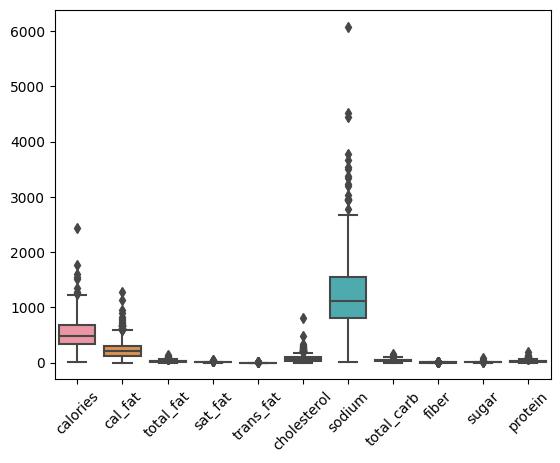

In [ ]:
# spread of attributes
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

- Sodium Content have high spread in compare to others

<Axes: >

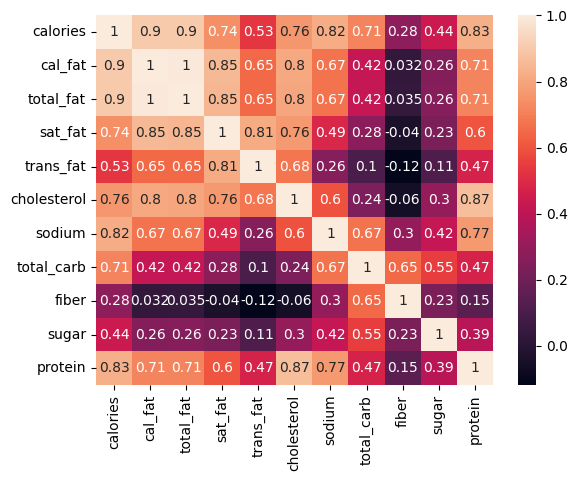

In [ ]:
# to Check the Correaltion of Different Columns
sns.heatmap(df.corr(),annot=True)

- There is a Reasonable Correlation between Variable

<Figure size 1000x500 with 0 Axes>

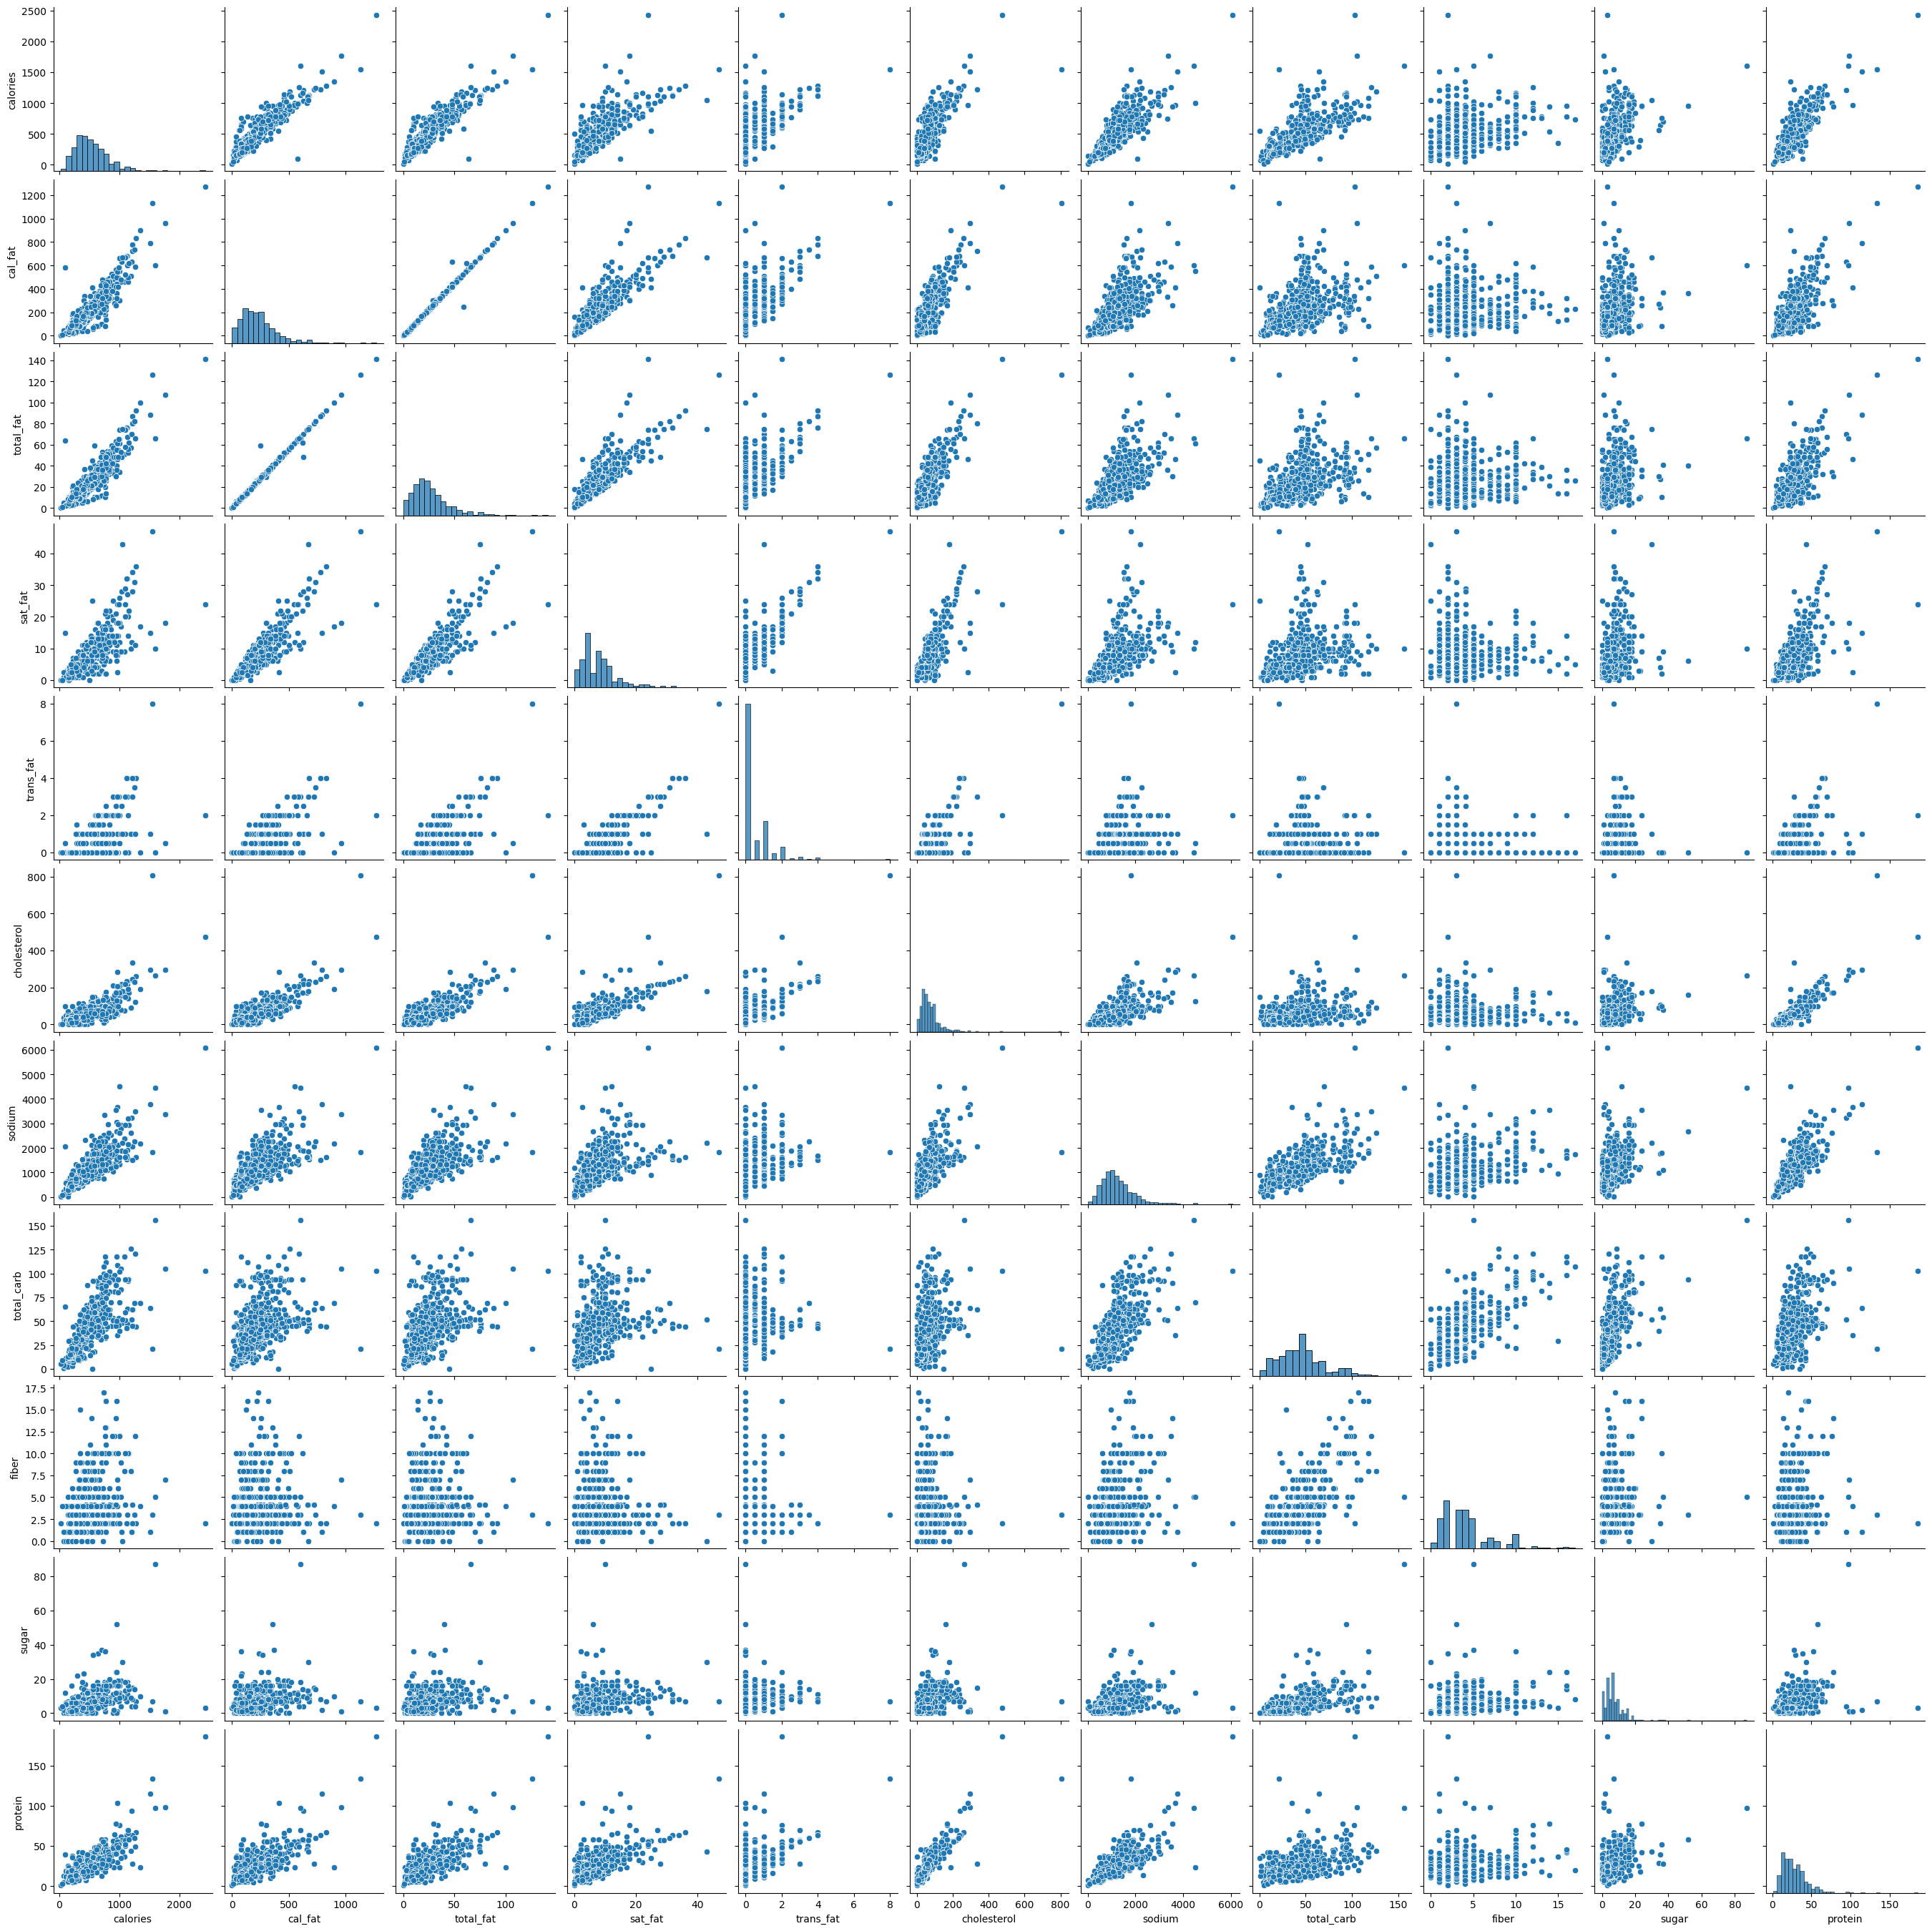

In [ ]:
# This Can be further demonstrated by the pairplot

plt.figure(figsize=(10,5))
sns.pairplot(df)

# Insights

In [ ]:
# Mean Attributes by Restaurant
details = df.groupby('restaurant').mean().sort_values(by='calories',ascending=False)

# Highlight the highest and lowest value in each column with red and green background colors, respectively
highlighted = details.style.highlight_max(color='red').highlight_min(color='green')

# Display the highlighted DataFrame
display(highlighted)

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
restaurant,,,,,,,,,,,
Mcdonalds,640.350877,285.614035,31.807018,8.289474,0.464912,109.736842,1437.894737,48.789474,3.228070,11.070175,40.298246
Sonic,631.698113,338.301887,37.641509,11.415094,0.933962,86.981132,1350.754717,47.207547,2.660377,6.528302,29.188679
Burger King,608.571429,333.757143,36.814286,11.150000,0.864286,100.857143,1223.571429,39.314286,2.633882,8.185714,29.984158
Arbys,532.727273,237.836364,26.981818,7.972727,0.418182,70.454545,1515.272727,44.872727,2.709091,7.563636,29.254545
Dairy Queen,520.238095,260.476190,28.857143,10.440476,0.678571,71.547619,1181.785714,38.690476,2.833333,6.357143,24.833333
Subway,503.020833,165.104167,18.479167,6.197917,0.218750,61.302083,1272.968750,54.718750,6.562500,10.093750,30.312500
Taco Bell,443.652174,188.000000,20.895652,6.591304,0.256522,39.043478,1013.913043,46.634783,5.713043,3.704348,17.417391
Chick Fil-A,384.444444,145.370370,16.148148,4.111111,0.037037,79.074074,1151.481481,28.629630,2.454606,4.148148,31.703704


**<span style="color:#682F2F;"> Which Restaurant have what content high and low is shown</span>**

**<span style="color:#682F2F;"> Like Mcdonalds Have High Calories Content then rest while chick Fil-A have relatively low-calorie, low-fat, and low-sugar content</span>**

**<span style="color:#682F2F;"> Thank You!</span>**



# Machine Learning Clustring

In [ ]:
df_num = df.select_dtypes(exclude='object')
df_num.head()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0
2,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0
3,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0
4,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features

scaler = StandardScaler()
X = scaler.fit_transform(df_num)
# Initialize the KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model to the standardized data
kmeans.fit(X)
# Predict the clusters for each data point in the standardized data
y_pred = kmeans.predict(X)

# Map the cluster labels to the "Good" or "Bad" food categories
food_categories = {0: 'Good', 1: 'Bad'}
y_pred = [food_categories[label] for label in y_pred]

# Add the predicted food category to the original DataFrame
df['Category'] = y_pred

# Display the first 5 rows of the DataFrame with the predicted food category
df.head()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,Category
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,Other,Good
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,Other,Bad
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,Other,Bad
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,Other,Bad
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,Other,Bad


In [ ]:
import plotly.express as px
plt.figure(figsize=(15,15))

# Create a scatter matrix with Plotly
fig = px.scatter_matrix(df, dimensions=list(df_num.columns), color='Category')

# Define the tooltip information
tooltip_labels = list(df.columns)

# Add the tooltip to the scatter matrix
for i in range(len(tooltip_labels)):
    fig.update_traces(
        hovertemplate='%{xaxis.title.text}: %{x}<br>'
                       '%{yaxis.title.text}: %{y}<br>',
        customdata=[df[col] for col in tooltip_labels])

# Display the scatter matrix
fig.show()

<Figure size 1500x1500 with 0 Axes>

In [ ]:
x = df[["total_fat", "total_carb", "sodium"]]
y= df["calories"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
import numpy as np
print(np.isnan(x_train).any())
print(np.isinf(x_train).any())
print(np.isnan(y_train).any())
print(np.isinf(y_train).any())

total_fat     False
total_carb    False
sodium        False
dtype: bool
total_fat     False
total_carb    False
sodium        False
dtype: bool
False
False


In [ ]:
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()
mlr.fit(x_train,y_train)


LinearRegression()

In [ ]:
print("intercept:", mlr.intercept_)
print("coefficiants:")
list(zip(x,mlr.coef_))

intercept: 15.686456431284057
coefficiants:


[('total_fat', 9.823035071470654),
 ('total_carb', 3.9926335265045423),
 ('sodium', 0.05544386660924472)]

In [ ]:
y_pred = mlr.predict(x_test)
print("prediction for test set:{}".format(y_pred))

prediction for test set:[ 313.47884301  555.53604468  355.7494352   742.89850212  431.92391798
  391.40796185  576.62230509  838.89205918  440.83613509  468.61831696
  162.25369416  907.29428479  591.76997675  675.84997027  379.70523635
  764.8196686   442.69486987  718.57885753  326.0714197   304.92227013
  565.85881735  890.71871055  775.70845478  923.78287154  407.61921278
  368.45285081  393.84811829  100.60617956  364.33371502  390.25306251
  485.64905469  480.73813906  638.10210787  696.93623069   51.52281075
  582.05440494  594.04917268  707.99054575   71.43730468  488.06824438
  400.55343165  329.34600234  758.676982    300.68891978  469.20311428
  331.62664616  390.47618824  501.17671299  543.45669708  270.02034112
  603.5531825   493.2678266   571.59645095  426.70746861  615.12266553
  484.57053602 1031.81794228  326.66031663 1023.06377879  334.45354056
  405.16411694  346.63769971  595.93368664  896.5719955   283.45602307
 1071.22693774  789.63423835  572.13329851  695.36351

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [ ]:
mlr_dif = pd.DataFrame({"actual value: ":y_test,"predited value: ":y_pred})
mlr_dif.head()

,actual value:,predited value:
304,320,313.478843
499,540,555.536045
441,340,355.749435
153,710,742.898502
501,440,431.923918


In [ ]:
from sklearn import metrics
meansquare = metrics.mean_squared_error(y_test, y_pred)
print("R-squared: {:.2f}".format(mlr.score(x, y) * 100))
print("Mean Squared Error: ", meansquare)

R-squared: 95.35
Mean Squared Error:  2361.262216060545


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [ ]:
from sklearn import metrics

# Calculate R-squared
r_squared = mlr.score(x, y) * 100
print("R-squared: {:.2f}".format(r_squared))

# Calculate mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Calculate root mean squared error
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

# Calculate mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)


R-squared: 95.35
Mean Squared Error:  2361.262216060545
Root Mean Squared Error:  48.59282062260376
Mean Absolute Error:  30.345442456796757


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg}")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, the average silhouette_score is 0.3785842009782279
For n_clusters = 3, the average silhouette_score is 0.31879359515937267
For n_clusters = 4, the average silhouette_score is 0.2950655173118056


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5, the average silhouette_score is 0.21810619840340428


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6, the average silhouette_score is 0.2126421508770386


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7, the average silhouette_score is 0.22724292143837005


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8, the average silhouette_score is 0.20198033415451047


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9, the average silhouette_score is 0.22612797406547872


HEALTHY OPTIONS

In [ ]:
restaurant_calories = df.groupby('restaurant').calories.mean().reset_index()
print(restaurant_calories)

    restaurant    calories
0        Arbys  532.727273
1  Burger King  608.571429
2  Chick Fil-A  384.444444
3  Dairy Queen  520.238095
4    Mcdonalds  640.350877
5        Sonic  631.698113
6       Subway  503.020833
7    Taco Bell  443.652174


<Axes: title={'center': 'Average Calories by Restaurant'}, xlabel='calories', ylabel='restaurant'>

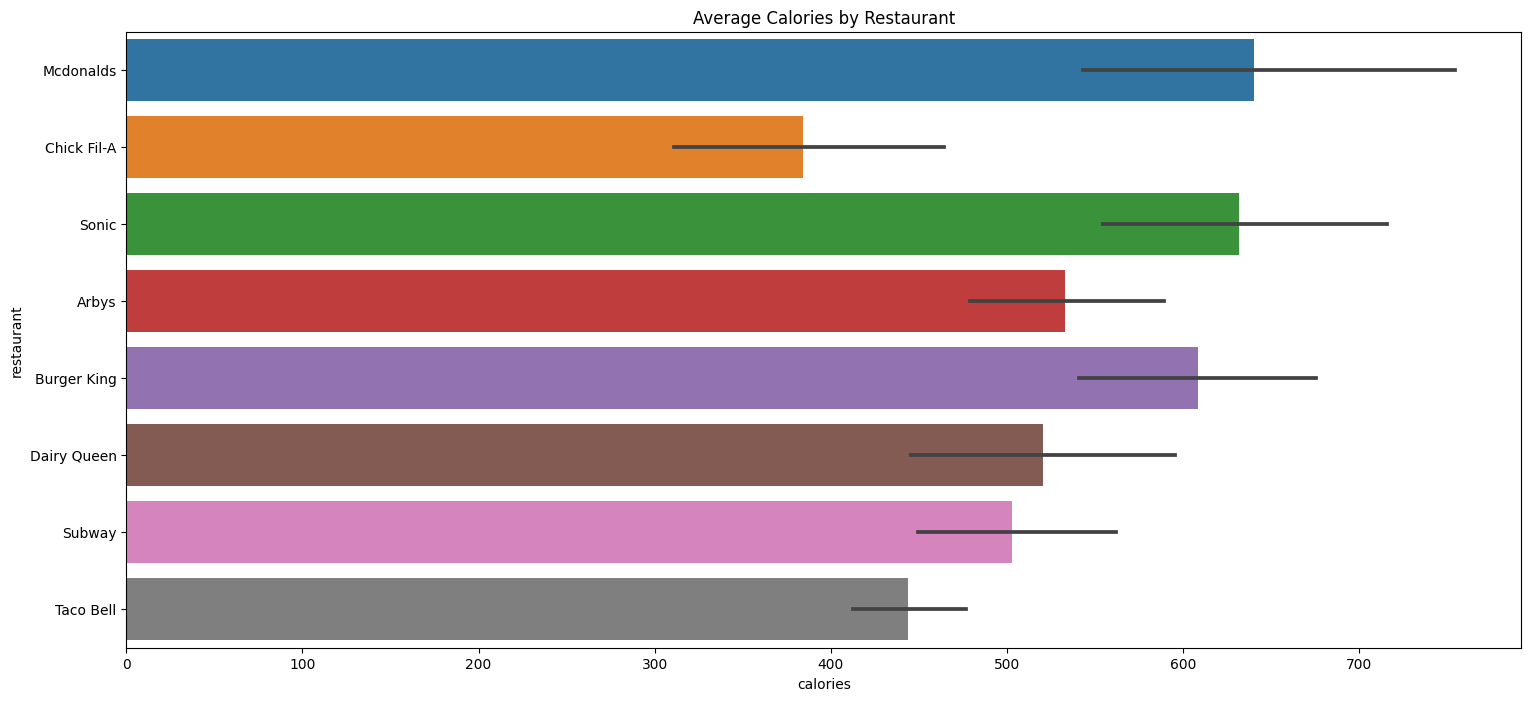

In [ ]:
plt.figure(figsize=(18, 8))
plt.title('Average Calories by Restaurant')
sns.barplot(y=df['restaurant'], x=df['calories'])

In [ ]:
restaurant_calories = df.groupby('restaurant').sodium.mean().reset_index()
print(restaurant_calories)

    restaurant       sodium
0        Arbys  1515.272727
1  Burger King  1223.571429
2  Chick Fil-A  1151.481481
3  Dairy Queen  1181.785714
4    Mcdonalds  1437.894737
5        Sonic  1350.754717
6       Subway  1272.968750
7    Taco Bell  1013.913043


<Axes: title={'center': 'Average Sodium by Restaurant'}, xlabel='sodium', ylabel='restaurant'>

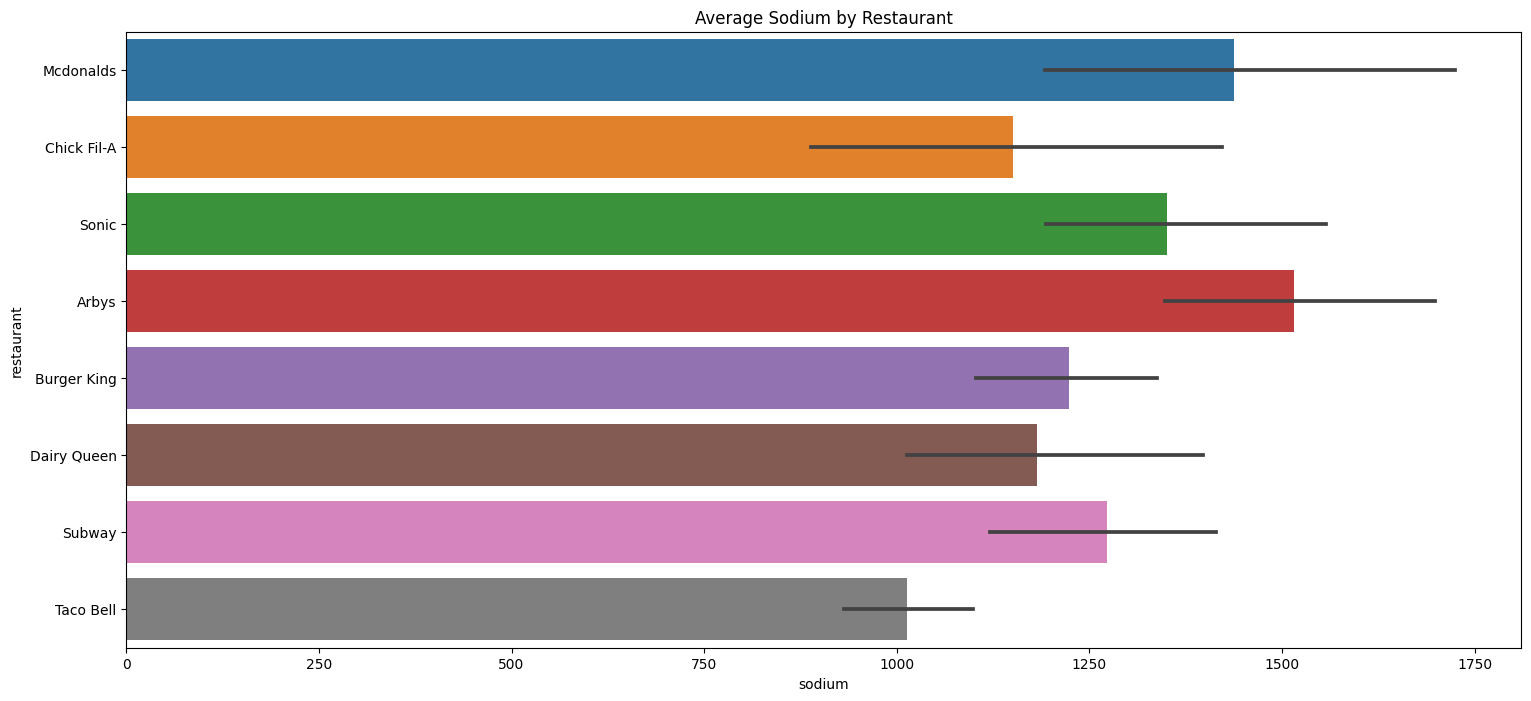

In [ ]:
plt.figure(figsize=(18, 8))
plt.title('Average Sodium by Restaurant')
sns.barplot(y=df['restaurant'], x=df['sodium'])

McDonald's "Okay" Options
According to Global News, the average meal should not be over 700 calories, so lets see what items at McDonalds we should be and shouldn't be eating.

<Axes: title={'center': 'McDonalds Calorie Per Item'}, xlabel='calories', ylabel='item'>

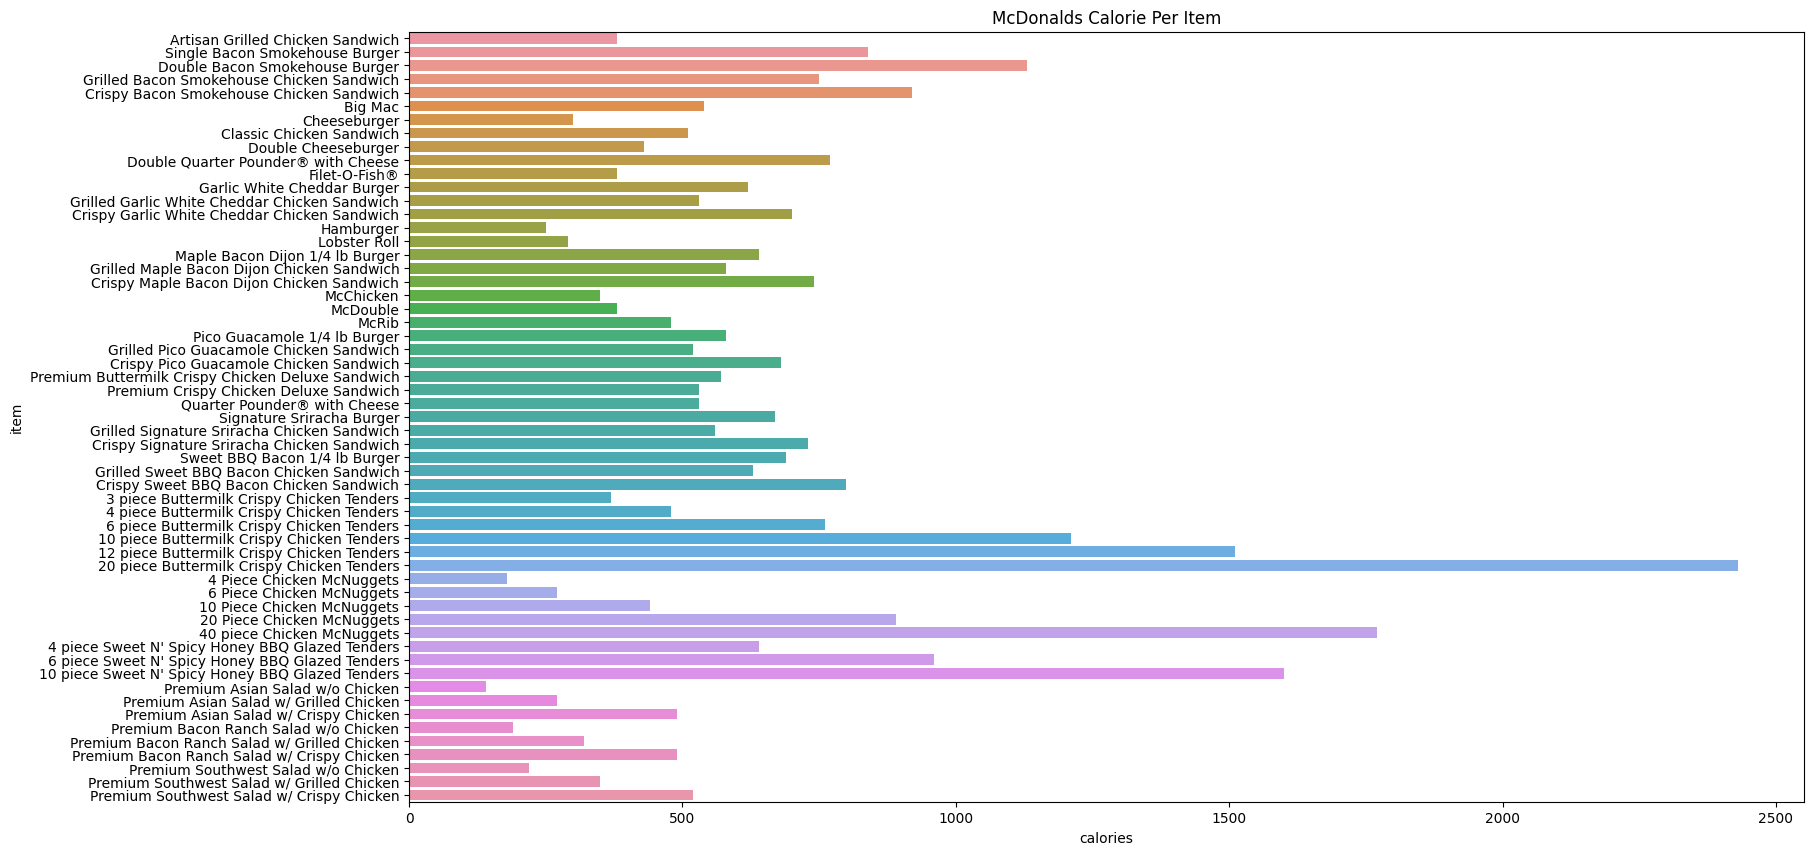

In [ ]:
mcd_info = df[df['restaurant'] == 'Mcdonalds']
plt.figure(figsize=(18, 10))
plt.title('McDonalds Calorie Per Item')
sns.barplot(y=mcd_info['item'], x=df['calories'])

In [ ]:
mcdonald_info = df[df['restaurant'] == 'Mcdonalds']


over700 = mcdonald_info['calories'] > 700
under700 = mcdonald_info['calories'] < 700
mcdonald_info.loc[:, 'over_700'] = over700
mcdonald_info.loc[:, 'under_700'] = under700
mcdonald_info = mcdonald_info.dropna(subset=['calories'])

<ipython-input-38-7ff3e292ad90>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-7ff3e292ad90>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for index, row in mcdonald_info.iterrows():
    if row['calories'] < 700:
        print(f"The {row['item']} is a item that is under 700 Calories")

The Artisan Grilled Chicken Sandwich is a item that is under 700 Calories
The Big Mac is a item that is under 700 Calories
The Cheeseburger is a item that is under 700 Calories
The Classic Chicken Sandwich is a item that is under 700 Calories
The Double Cheeseburger is a item that is under 700 Calories
The Filet-O-Fish® is a item that is under 700 Calories
The Garlic White Cheddar Burger is a item that is under 700 Calories
The Grilled Garlic White Cheddar Chicken Sandwich is a item that is under 700 Calories
The Hamburger is a item that is under 700 Calories
The Lobster Roll is a item that is under 700 Calories
The Maple Bacon Dijon 1/4 lb Burger is a item that is under 700 Calories
The Grilled Maple Bacon Dijon Chicken Sandwich is a item that is under 700 Calories
The McChicken is a item that is under 700 Calories
The McDouble is a item that is under 700 Calories
The McRib is a item that is under 700 Calories
The Pico Guacamole 1/4 lb Burger is a item that is under 700 Calories
The G

<Axes: title={'center': 'Arbys Sodium Per Item by Mg'}, xlabel='sodium', ylabel='item'>

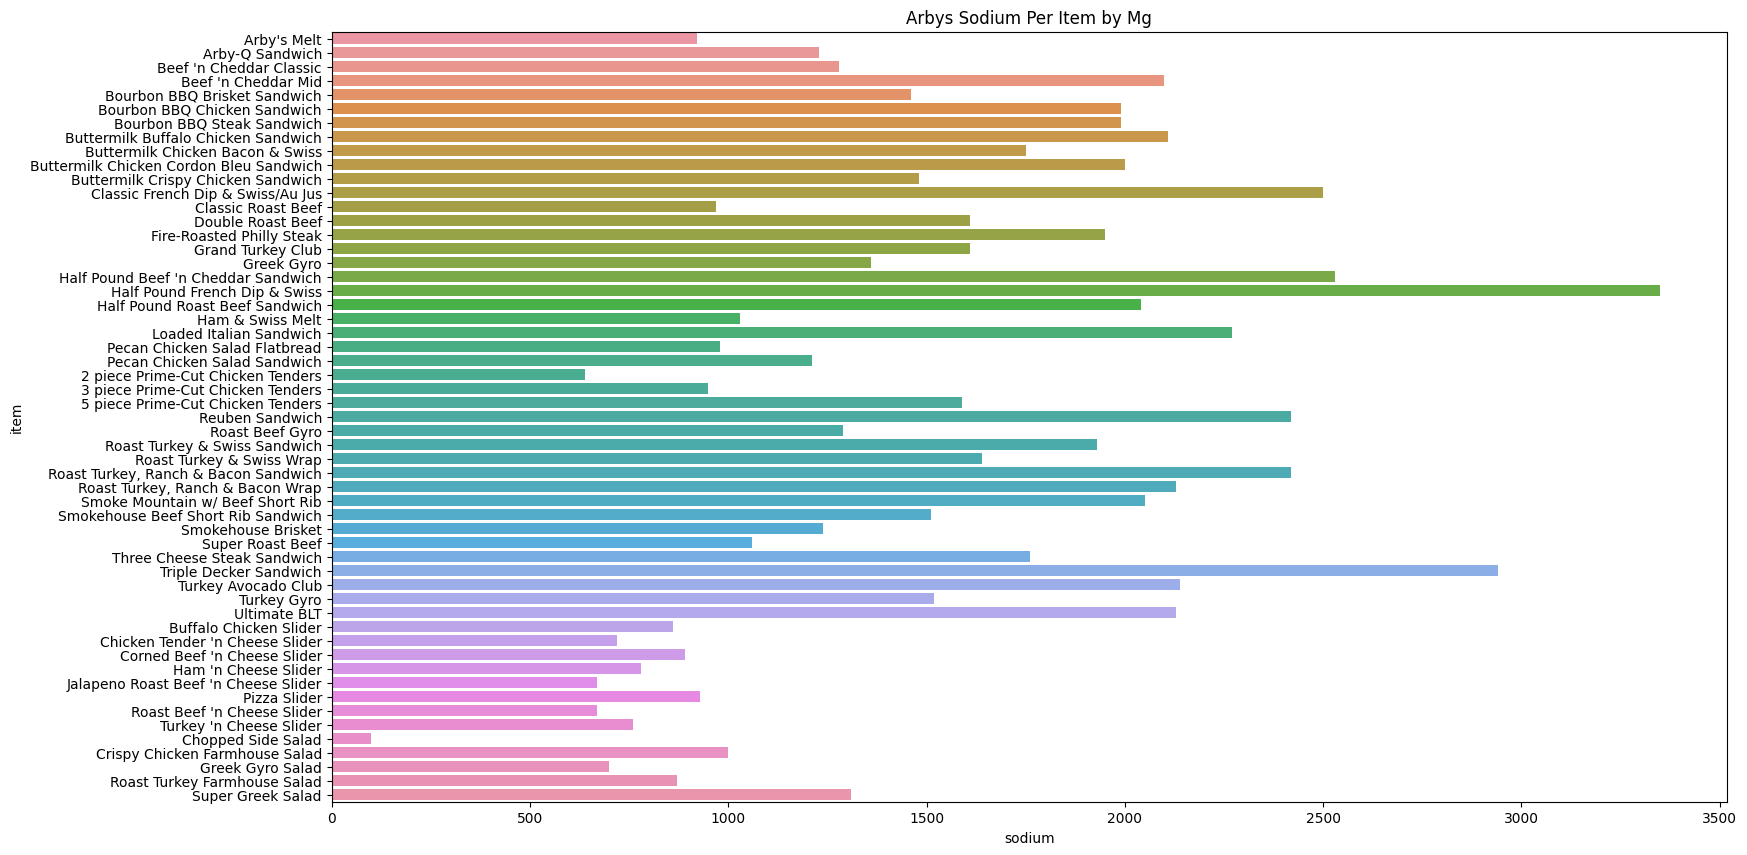

In [ ]:
arbys_info = df[df['restaurant'] == 'Arbys']
plt.figure(figsize=(18, 10))
plt.title('Arbys Sodium Per Item by Mg')
sns.barplot(y=arbys_info['item'], x=df['sodium'])

<Axes: title={'center': 'Items under 600mg per serving'}, xlabel='sodium', ylabel='item'>

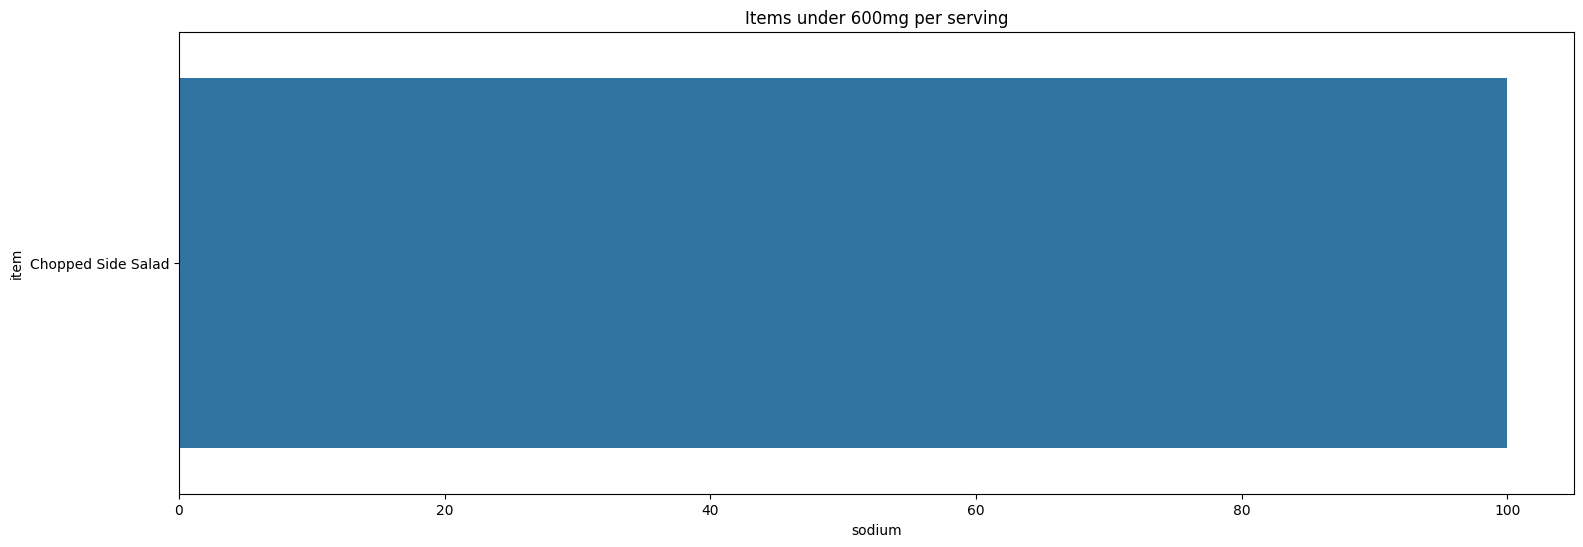

In [ ]:
low_sodium_arbys = df[(df['restaurant'] == 'Arbys') & (df['sodium'] < 600)]
plt.figure(figsize=(18, 6))
plt.title('Items under 600mg per serving')
sns.barplot(y=low_sodium_arbys['item'], x=low_sodium_arbys['sodium'])

Looks like they only have 1 item under 600mg of salt.

Finding The Healthies restaurant
This last part of the analysis is the most interesting. I am going to be making a scoring system and the restaurant with the highest score is the healthies.
The scoring system will be based off of 4 columns

Column 1: Protein If the restaurant has a item with protein of 0 - 15, it will get 1 point, if it has 16-30 it will get 2 points, if it is over 30 it will get 3 points.

Column 2: Sugar If the restaurant has an item with sugar amount of 0 - 16 it will get 3 points 17 - 36 will get 2 and anything over that will be 1 point

Column 3: Calories If the restaurant has an item range of 400 - 700 it will get 3 anything over that will get 1

Column 4: Sodium If the restaurant has an item with sodium of 200-400 it will get 3 points, 401 - 600 is 2 points and anything over that is 1

Finally, lets begin (The goal of this is to find the restaurant that on AVERAGE serves the healthies items)

In [ ]:
df['health_score'] = 0

In [ ]:
#Getting Sodium Points
for index, row in df.iterrows():
    if (row['sodium'] >= 200) and (row['sodium'] <= 400):
        df.at[index, 'health_score'] = row['health_score'] + 3
    elif (row['sodium'] >= 401) and (row['sodium'] <= 600):
        df.at[index, 'health_score'] = row['health_score'] + 2
    else:
        df.at[index, 'health_score'] = row['health_score'] + 1

In [ ]:
#Getting Protein Health Points
for index, row in df.iterrows():
    if (row['protein'] >= 0) and (row['protein'] <= 15):
        df.at[index, 'health_score'] = row['health_score'] + 1
    elif (row['protein'] >= 16) and (row['protein'] <= 30):
        df.at[index, 'health_score'] = row['health_score'] + 2
    elif (row['protein'] > 30):
        df.at[index, 'health_score'] = row['health_score'] + 3

In [ ]:
#Getting Calorie Health Points
for index, row in df.iterrows():
    if (row['calories'] >= 400) and (row['calories'] <= 700):
        df.at[index, 'health_score'] = row['health_score'] + 3
    else:
        df.at[index, 'health_score'] = row['health_score'] + 1

In [ ]:
#Getting Sugar Health Points
for index, row in df.iterrows():
    if (row['sugar'] >= 0) and (row['sugar'] <= 16):
        df.at[index, 'health_score'] = row['health_score'] + 3
    elif (row['sugar'] >= 17) and (row['sugar'] <= 36):
        df.at[index, 'health_score'] = row['health_score'] + 2
    else:
        df.at[index, 'health_score'] = row['health_score'] + 1

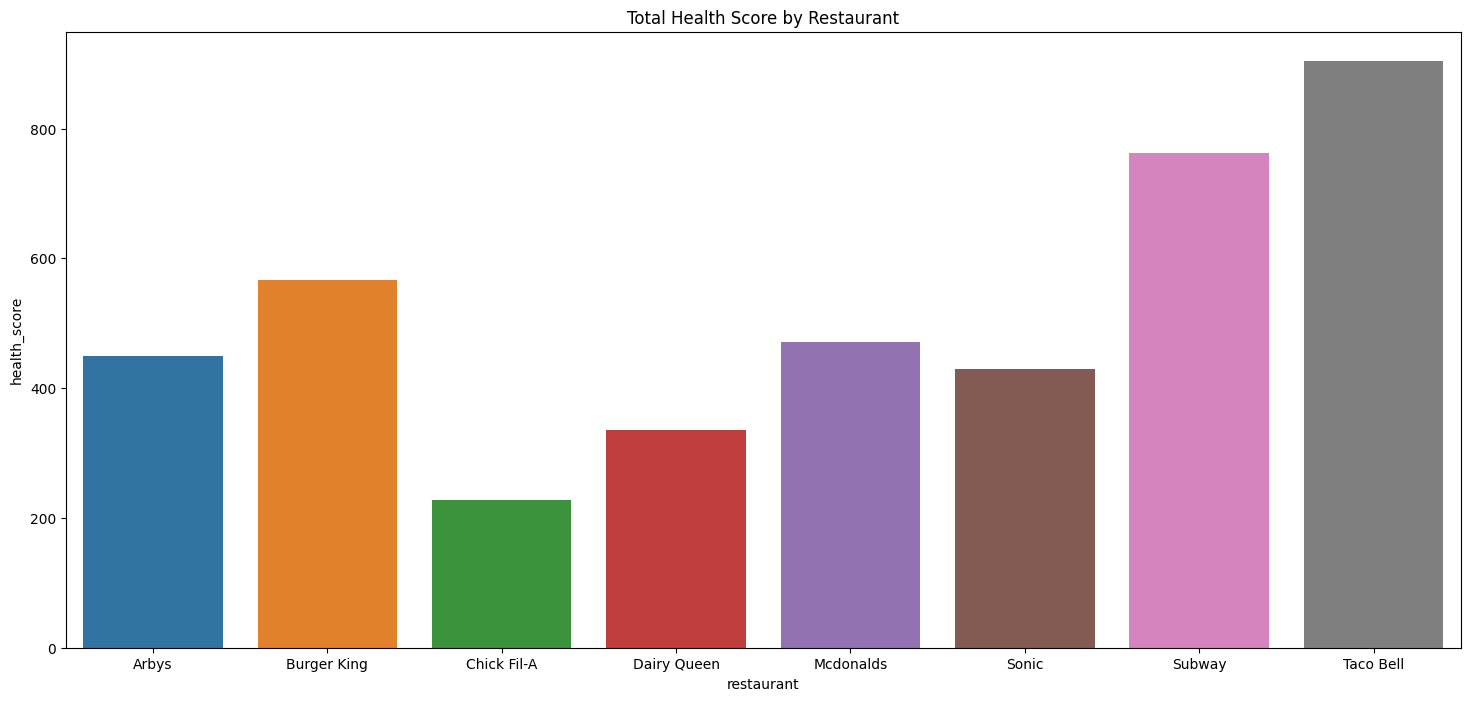

In [ ]:
healthscore_by_restaurant = df.groupby('restaurant')['health_score'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(18, 8))
plt.title('Total Health Score by Restaurant')
sns.barplot(x='restaurant', y='health_score', data=healthscore_by_restaurant)
plt.show()

What We Learned
Based off this very simple point system is that Taco Bell has the most items that are "Healthy". These items are more than likely not the best choice

but, we did learn that taco bell has the widest variety of items with SOME benefits.